## The Rate Of Changes of the Species Corresponding to the Law of Mass Action 



$\frac{dE}{dt} = k_2[ES] - k_1[E][S] + k_3[ES]$

$\frac{dS}{dt} = k_2[ES] - k_1 [E][S]$

$\frac{dES}{dt} = k_1[E][S] - k_2[ES] - k_3[ES]$

$\frac{dP}{dt} = k_3[ES]$

## Code Implementation


Let us define  function fX, corresponding to $\frac{dX}{dt}$, the change in species X w.r.t time.

We have 4 derivative functions, fE, fS, fES,fP
We define $k_{ij}$, which is the gradient of change of $j \in \{E,ES, S, P\}$ at runge kutta order i.
We have 4 terms, corresponding to each variable at each level

$k_{1E}= f_E(t_0, E_0, S_0, ES_0) h$

$k_{1S}= f_S(t_0, E_0, S_0, ES_0) h$

$k_{1ES}= f_ES(t_0, E_0, S_0, ES_0) h$

$k_{1P}= f_P(t_0, E_0, S_0, ES_0) h$

$k_{2E}= f_E(t_0+ h/2, E_0 + k_{1E}/2, S_0 + k_{1S}/2, ES_0 + k_{1ES}/2) h$

$k_{2S}= f_S(t_0+ h/2, E_0 + k_{1E}/2, S_0 + k_{1S}/2, ES_0 + k_{1ES}/2) h$

$k_{2ES}= f_ES(t_0+ h/2, E_0 + k_{1E}/2, S_0 + k_{1S}/2, ES_0 + k_{1ES}/2) h$

$k_{2P}= f_P(t_0+ h/2, E_0 + k_{1E}/2, S_0 + k_{1S}/2, ES_0 + k_{1ES}/2) h$

    

$k_{3E}= f_E(t_0+ h/2, E_0 + k_{2E}/2, S_0 + k_{2S}/2, ES_0 + k_{2ES}/2) h$

$k_{3S}= f_S(t_0+ h/2, E_0 + k_{2E}/2, S_0 + k_{2S}/2, ES_0 + k_{2ES}/2) h$

$k_{3ES}= f_ES(t_0+ h/2, E_0 + k_{2E}/2, S_0 + k_{2S}/2, ES_0 + k_{2ES}/2) h$

$k_{3P}= f_P(t_0+ h/2, E_0 + k_{2E}/2, S_0 + k_{2S}/2, ES_0 + k_{2ES}/2) h$
 

$k_{4E}= f_E(t_0+ h, E_0 + k_{3E}, S_0 + k_{3S}, ES_0 + k_{3ES}) h$

$k_{4S}= f_S(t_0+ h, E_0 + k_{3E}, S_0 + k_{3S}, ES_0 + k_{3ES}) h$

$k_{4ES}= f_{ES}(t_0+ h, E_0 + k_{3E}, S_0 + k_{3S}, ES_0 + k_{3ES}) h$

$k_{4P}= f_P(t_0+ h, E_0 + k_{3E}, S_0 + k_{3S}, ES_0 + k_{3ES}) h$

$E_1= E_0 + (k_{1E} + 2k_{2E} + 2k_{3E} + k_{4E})/6$
 
$S_1= S_0 + (k_{1S} + 2k_{2S} + 2k_{3S} + k_{4S})/6$

$ES_1= ES_0 + (k_{1ES} + 2k_2ES + 2k_{3ES} + k_{4ES})/6$

$P_1= P_0 + (k_{1P} + 2k_{2P} + 2k_{3P} + k_{4P})/6$
 



In [11]:
import numpy as np
import matplotlib.pyplot as plt

### Define the rate constants (rate per second)

In [2]:

k1 = 100/60
k2= 600/60
k3 = 150/60


### Define the derivative functions

In [3]:

def fE(t,E,S,ES) :
  r= k2 * ES - k1* E * S + k3 *ES
  return r

def fS(t,E,S,ES) :
  r= k2* ES - k1* E * S
  return   r

def fES(t,E,S,ES) :
  r=k1 * E * S - (k2 * ES + k3 * ES)
  return  r

def fP(t,E,S,ES) :
  r=k3 * ES
  return k3 * ES



### Define the Step Function, which is one step in the numerical simulation

In [4]:


def step (t0,E0,S0,ES0, P0,h):
  # outputs t1, E1, S1, ES1, P1 , or the predicted values for the next time step, given the orevious time step
  k1E= fE(t0, E0, S0, ES0) * h
  k1S= fS(t0, E0, S0, ES0) * h
  k1ES= fES(t0, E0, S0, ES0) * h
  k1P= fP(t0, E0, S0, ES0) * h

  k2E = fE(t0 + h/2 , E0 + k1E/2 , S0 + k1S/2, ES0 + k1ES/2)*h
  k2S = fS(t0 + h/2 , E0 + k1E/2 , S0 + k1S/2, ES0 + k1ES/2)*h
  k2ES = fES(t0 + h/2 , E0 + k1E/2 , S0 + k1S/2, ES0 + k1ES/2)*h
  k2P = fP(t0 + h/2 , E0 + k1E/2 , S0 + k1S/2, ES0 + k1ES/2)*h

  k3E = fE(t0 + h/2, E0 + k2E/2 , S0 + k2S/2 , ES0 + k2ES/2)*h
  k3S = fS(t0 + h/2, E0 + k2E/2 , S0 + k2S/2 , ES0 + k2ES/2)*h
  k3ES = fES(t0 + h/2, E0 + k2E/2 , S0 + k2S/2 , ES0 + k2ES/2)*h
  k3P = fP(t0 + h/2, E0 + k2E/2 , S0 + k2S/2 , ES0 + k2ES/2)*h

  k4E= fE(t0+ h, E0 + k3E, S0 + k3S, ES0 + k3E)* h
  k4S= fS(t0+ h, E0 + k3E, S0 + k3S, ES0 + k3ES)* h
  k4ES= fES(t0+ h, E0 + k3E, S0 + k3S, ES0 + k3ES)* h
  k4P= fP(t0+ h, E0 + k3E, S0 + k3S, ES0 + k3ES)* h

  t1 = t0 + h
  E1 = E0 + (k1E + 2* k2E + 2 *k3E + k4E)/6
  S1 = S0 + (k1S + 2* k2S + 2 *k3S + k4S)/6
  ES1 = ES0 + (k1ES + 2* k2ES + 2 *k3ES + k4ES)/6
  P1 = P0 + (k1P + 2* k2P + 2 *k3P + k4P)/6

  return t1,E1,S1,ES1,P1



### Define the Simulation Loop


Here, we shall be simulating the reaction between 0 and 100 seconds, with a time step of 0.01 s

In [5]:

# store the datapoints for plotting,
# the datapoints will be stored as a list of numpy arrays, [tn,En, Sn, ESn, Pn, V], where V is velocity of reaction, or dP/dt
datapoints = []


#define the initial conditions
t_start=0
h =0.01
t_end = 100
def simulate(S):
    #abort after 30 iterations, just to calculate the v0
    E= 1
    #S=10
    ES=0
    P=0
    t=t_start
    i=0
    while t < t_end:
      i+=1
      
      t1,E1,S1,ES1,P1 = step(t,E,S,ES,P,h)


      # calculate the velocity of P

      v = (P1- P)/ (t1-t)

      # print the current state for debugging. This is commented out for production
      #print(f" t= {t1:.3f}, E= {E1:.3f}, S= {S1:.3f}, ES= {ES1:.3f}, P= {P1:.3f}, V= {v:.3f}")



      datapoints.append(np.array([t1,E1,S1,ES1,P1,v]))
      t,E,S,ES,P = t1,E1,S1,ES1,P1



    return datapoints
datapoints= simulate(10)
data_np = np.array(datapoints)




### Plot the Concentrations of the species w.r.t Time

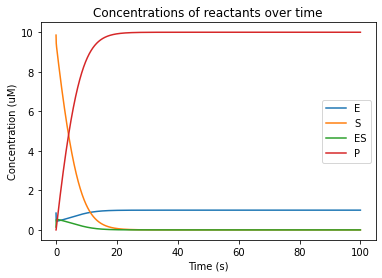

In [6]:

plt.plot(data_np[:,0], data_np[:,1], label="E")
plt.plot(data_np[:,0], data_np[:,2], label="S")
plt.plot(data_np[:,0], data_np[:,3], label="ES")
plt.plot(data_np[:,0], data_np[:,4], label="P")

plt.title("Concentrations of reactants over time")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (uM)")
plt.legend()
plt.show()

### Initial Rate of Reaction ($V_0$) Against  Substrate Concentration

In [10]:

rates=[]
substrates=[]
for S in range (1,100):
    datapoints= simulate(S)
    data_np = np.array(datapoints)
    v0= np.max(data_np[:,5])
    rates.append(v0)
    substrates.append(S)
    #commented out for production purposes
    #print(f"S: {S}, V0: {v0}")

    #plt.plot(data_np[:, 0], data_np[:, 5], label="V")
    #plt.title("Concentrations of reactants over time")
    #plt.xlabel("Time (s)")
    #plt.ylabel("Concentration")
    #plt.legend()
    #plt.show()


### Plot the Results and Obtain the Maximal Initial Veolcity

the maximum rate is 2.152 uM/s, it occurs at around substrate concentration of 67 uM


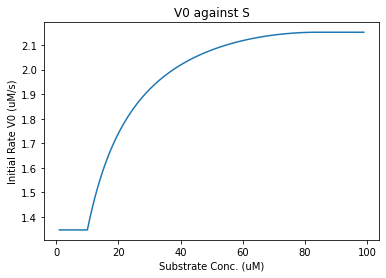

In [9]:


vmax= np.max(rates)
for i in range (1, len(rates)):
    prev_rate= rates[i-1]
    rate = rates[i]
    if(rate/prev_rate<1.001 and substrates[i]>20):
        asymp=i
        break
s_asymp= substrates[asymp]
print(f"the maximum rate is {vmax:.3f} uM/s, it occurs at around substrate concentration of {s_asymp} uM")
plt.plot(substrates, rates)
plt.title("V0 against S")
plt.xlabel("Substrate Conc. (uM)")
plt.ylabel("Initial Rate V0 (uM/s)")
plt.show()

The maximum rate is 2.152 uM/s, it occurs at around substrate concentration of 67 uM